### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [9]:
import pandas as pd
import numpy as np


In [10]:
file_path = '/content/drive/MyDrive/PrognosAI_OCT25/Data/raw/train_FD001.txt'

In [11]:
column_names = [
    "engine_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1, 22)]


In [12]:
df = pd.read_csv(file_path, sep=" ", header=None, names=column_names)

# Display shape, data types, and first 5 rows
print("DataFrame Shape:", df.shape)
print("\nDataFrame Info:")
display(df.info())
print("\nFirst 5 Rows:")
display(df.head())

DataFrame Shape: (20631, 26)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20631 entries, (np.int64(1), np.int64(1)) to (np.int64(100), np.int64(200))
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  float64
 1   cycle         20631 non-null  float64
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20

None


First 5 Rows:


engine_id   cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
1 1    -0.0007 -0.0004         100.0        518.67        641.82   1589.70   
  2     0.0019 -0.0003         100.0        518.67        642.15   1591.82   
  3    -0.0043  0.0003         100.0        518.67        642.35   1587.99   
  4     0.0007  0.0000         100.0        518.67        642.35   1582.79   
  5    -0.0019 -0.0002         100.0        518.67        642.37   1582.85   

     sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
1 1   1400.60     14.62     21.61    554.36  ...    8138.62     8.4195   
  2   1403.14     14.62     21.61    553.75  ...    8131.49     8.4318   
  3   1404.20     14.62     21.61    554.26  ...    8133.23     8.4178   
  4   1401.87     14.62     21.61    554.45  ...    8133.83     8.3682   
  5   1406.22     14.62     21.61    554.00  ...    8133.80     8.4294   

     sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
1 1       0.03        392       2388      100.0      39.06    23.4190   
  2       0.03        392       2388      100.0      39.00    23.4236   
  3       0.03        390       2388      100.0      38.95    23.3442   
  4       0.03        392       2388      100.0      38.88    23.3739   
  5       0.03        393       2388      100.0      38.90    23.4044   

     sensor_20  sensor_21  
1 1        NaN        NaN  
  2        NaN        NaN  
  3        NaN        NaN  
  4        NaN        NaN  
  5        NaN        NaN  

[5 rows x 26 columns]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

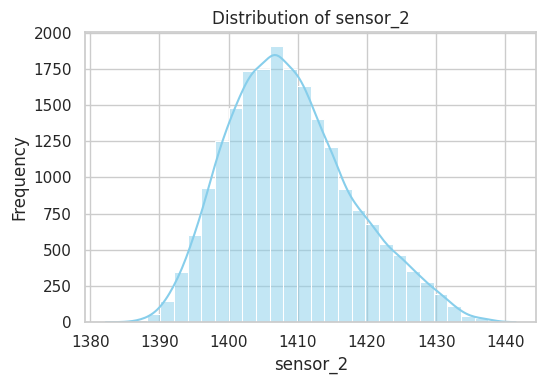

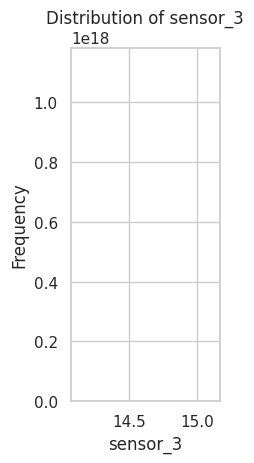

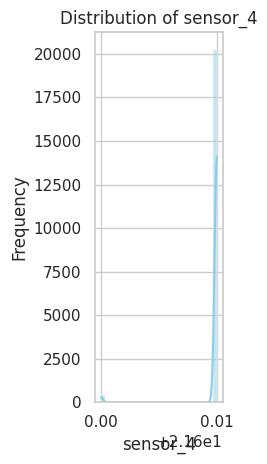

Missing Values per Column:

sensor_20    20631
sensor_21    20631
dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
selected_sensors=['sensor_2','sensor_3','sensor_4']
plt.figure(figsize=(15,4))
for i, sensor in enumerate(selected_sensors, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[sensor], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {sensor}")
    plt.xlabel(sensor)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
missing_values = df.isnull().sum()
print("Missing Values per Column:\n")
# Filter for columns with any missing values
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print(missing_values)
else:
    print("No missing values found!")

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [19]:
import pandas as pd
column_names = ['engine_id', 'cycle'] + [f'op_setting_{i}' for i in range(1,4)] + [f'sensor_{i}' for i in range(1,22)]
df.columns = column_names
engine_stats = df.groupby('engine_id')['sensor_2'].agg(['mean', 'std']).reset_index()
engine_stats.rename(columns={'mean': 'sensor_2_mean_by_engine', 'std': 'sensor_2_std_by_engine'}, inplace=True)
df = df.merge(engine_stats, on='engine_id', how='left')
df['sensor_2_rolling_mean'] = df.groupby('engine_id')['sensor_2'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
print(df[['engine_id', 'cycle', 'sensor_2', 'sensor_2_mean_by_engine', 'sensor_2_std_by_engine', 'sensor_2_rolling_mean']].head(10))


   engine_id   cycle  sensor_2  sensor_2_mean_by_engine  \
0    -0.0007 -0.0004   1400.60              1408.129371   
1     0.0019 -0.0003   1403.14              1408.955462   
2    -0.0043  0.0003   1404.20              1408.468060   
3     0.0007  0.0000   1401.87              1409.051092   
4    -0.0019 -0.0002   1406.22              1408.678421   
5    -0.0043 -0.0001   1398.37              1408.468060   
6     0.0010  0.0001   1397.77              1408.588991   
7    -0.0034  0.0003   1400.97              1407.744393   
8     0.0008  0.0001   1394.80              1408.496406   
9    -0.0033  0.0001   1400.46              1408.793538   

   sensor_2_std_by_engine  sensor_2_rolling_mean  
0                8.397980               1400.600  
1                8.936325               1403.140  
2                8.386406               1404.200  
3                9.667088               1401.870  
4                9.212205               1406.220  
5                8.386406               1401

#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Exclude sensor_20 and sensor_21 as they contain only missing values
sensor_columns = [col for col in df.columns if 'sensor_' in col and col not in ['sensor_20', 'sensor_21']]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[sensor_columns])
df_normalized = pd.DataFrame(scaled_values, columns=sensor_columns)

print(" Normalized DataFrame (first 5 rows):")
display(df_normalized.head())

print("\nChecking normalization stats:")
print("Means (should be close to 0):")
display(df_normalized[sensor_columns].mean().round(3))
print("\nStandard Deviations (should be close to 1):")
display(df_normalized[sensor_columns].std().round(3))

 Normalized DataFrame (first 5 rows):


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_2_mean_by_engine,sensor_2_std_by_engine,sensor_2_rolling_mean
0,-0.134255,-0.925936,-1.776357e-15,0.141683,1.121141,-0.516338,-0.862813,0.0,-0.266467,0.334262,...,-0.603816,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,-0.973173,-1.129763,-1.745160
1,0.211528,-0.643726,-1.776357e-15,0.141683,0.431930,-0.798093,-0.958818,0.0,-0.191583,1.174899,...,-0.275852,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,0.026229,-0.086548,-1.208783
2,-0.413166,-0.525953,-1.776357e-15,0.141683,1.008155,-0.234584,-0.557139,0.0,-1.015303,1.364721,...,-0.649144,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,-0.563429,-1.152191,-0.984940
3,-1.261314,-0.784831,-1.776357e-15,0.141683,1.222827,0.188048,-0.713826,0.0,-1.539489,1.961302,...,-1.971665,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,0.141922,1.329542,-1.476971
4,-1.251528,-0.301518,-1.776357e-15,0.141683,0.714393,-0.516338,-0.457059,0.0,-0.977861,1.052871,...,-0.339845,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,-0.308935,0.448058,-0.558371



Checking normalization stats:
Means (should be close to 0):


,0
sensor_1,-0.0
sensor_2,0.0
sensor_3,-0.0
sensor_4,-0.0
sensor_5,-0.0
sensor_6,0.0
sensor_7,-0.0
sensor_8,0.0
sensor_9,-0.0
sensor_10,-0.0



Standard Deviations (should be close to 1):


,0
sensor_1,1.0
sensor_2,1.0
sensor_3,0.0
sensor_4,1.0
sensor_5,1.0
sensor_6,1.0
sensor_7,1.0
sensor_8,0.0
sensor_9,1.0
sensor_10,1.0


#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.

In [25]:
import numpy as np
import pandas as pd

def generate_sequences(df, window_size=30):
    sensor_columns = [col for col in df.columns if 'sensor_' in col]
    X, engine_ids, last_cycles = [], [], []
    for engine_id, group in df.groupby('engine_id'):
        group = group.sort_values('cycle')
        data = group[sensor_columns].values
        for i in range(len(data) - window_size + 1):
            X.append(data[i:i+window_size])
            engine_ids.append(engine_id)
            last_cycles.append(group.iloc[i + window_size - 1]['cycle'])

    X = np.array(X)
    return X, engine_ids, last_cycles

# Merge engine_id and cycle from the original df into df_normalized
df_processed = df[['engine_id', 'cycle']].merge(df_normalized, left_index=True, right_index=True)

X, engine_ids, last_cycles = generate_sequences(df_processed, window_size=30)

print("Sequences generated successfully!")
print(f"Shape of sequence array: {X.shape}")
print("\nExample of first sequence (sensor values):")
print(X[0])

# Save engine_ids and last_cycles to CSV
engine_ids_df = pd.DataFrame({'engine_id': engine_ids})
last_cycles_df = pd.DataFrame({'last_cycle': last_cycles})

engine_ids_df.to_csv('/content/engine_ids.csv', index=False)
last_cycles_df.to_csv('/content/last_cycles.csv', index=False)

print("\nEngine IDs and Last Cycles saved to CSV.")

Sequences generated successfully!
Shape of sequence array: (17302, 30, 22)

Example of first sequence (sensor values):
[[-7.47531873e-01  2.96233753e-01 -1.77635684e-15  1.41683329e-01
  -5.62340558e-01 -9.37065165e-02 -8.16622567e-01  0.00000000e+00
  -3.41350266e-01 -4.11464958e-01  5.35005455e-02 -8.12694214e-01
  -5.85151088e-01 -1.38777878e-17 -1.36017565e-01  0.00000000e+00
   0.00000000e+00  9.05872993e-01 -2.00514656e-01  9.42393815e-01
   1.49175039e+00  8.26497171e-01]
 [ 1.41393127e-01  1.34174439e+00 -1.77635684e-15  1.41683329e-01
  -8.89997959e-01  8.92434560e-01  2.10895148e-01  0.00000000e+00
   1.15632314e+00 -1.69953852e+00  7.48744784e-01 -2.79555576e-01
   7.72032810e-01 -1.38777878e-17  1.15536688e+00  0.00000000e+00
   0.00000000e+00 -1.14124336e+00 -4.79502997e-01  9.42393815e-01
   1.49175039e+00  3.61917868e-01]
 [ 6.96267049e-02  1.58461894e-01 -1.77635684e-15  1.41683329e-01
  -5.39066603e-02 -9.37065165e-02 -6.99334296e-01  0.00000000e+00
   2.20277262e-01 -